In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.impute import SimpleImputer

In [3]:
data = pd.read_csv('heart.csv')

In [4]:
data.isnull().any().any()

False

In [5]:
for i in data.columns:
    data[i]=data[i].replace("?",np.nan)#it will replace non integer with "?"
    data[i]=data[i].astype(float)
    

In [6]:
#It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

#age: The person's age in years
#sex: The person's sex (1 = male, 0 = female)
#cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
#trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
#chol: The person's cholesterol measurement in mg/dl
#fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
#restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
#thalach: The person's maximum heart rate achieved
#exang: Exercise induced angina (1 = yes; 0 = no)
#oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
#slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
#ca: The number of major vessels (0-3)
#thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
#target: Heart disease (0 = no, 1 = yes)

In [7]:
data = data.rename(columns={'cp':'Chest Pain' , 'trestbps':'BP','chol':'cholestoral','fbs':'fasting blood sugar','restecg':'Resting ECG','thalach':'Max Heart Rate','exang':'exercise induced angina','thal':'Thalassemia','num       ':'object'})
data

,age,sex,Chest Pain,BP,cholestoral,fasting blood sugar,Resting ECG,Max Heart Rate,exercise induced angina,oldpeak,slope,ca,Thalassemia,target
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,0.0
1,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0.0
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0.0
4,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,1.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1.0,1.0,140.0,221.0,0.0,1.0,164.0,1.0,0.0,2.0,0.0,2.0,1.0
1021,60.0,1.0,0.0,125.0,258.0,0.0,0.0,141.0,1.0,2.8,1.0,1.0,3.0,0.0
1022,47.0,1.0,0.0,110.0,275.0,0.0,0.0,118.0,1.0,1.0,1.0,1.0,2.0,0.0
1023,50.0,0.0,0.0,110.0,254.0,0.0,0.0,159.0,0.0,0.0,2.0,0.0,2.0,1.0


In [8]:
data.count()

age                        1025
sex                        1025
Chest Pain                 1025
BP                         1025
cholestoral                1025
fasting blood sugar        1025
Resting ECG                1025
Max Heart Rate             1025
exercise induced angina    1025
oldpeak                    1025
slope                      1025
ca                         1025
Thalassemia                1025
target                     1025
dtype: int64

In [9]:
for i in data.columns:
    if data[i].count() <  1000:
        del data[i]

In [10]:
data.count()

age                        1025
sex                        1025
Chest Pain                 1025
BP                         1025
cholestoral                1025
fasting blood sugar        1025
Resting ECG                1025
Max Heart Rate             1025
exercise induced angina    1025
oldpeak                    1025
slope                      1025
ca                         1025
Thalassemia                1025
target                     1025
dtype: int64

In [11]:
data.dtypes

age                        float64
sex                        float64
Chest Pain                 float64
BP                         float64
cholestoral                float64
fasting blood sugar        float64
Resting ECG                float64
Max Heart Rate             float64
exercise induced angina    float64
oldpeak                    float64
slope                      float64
ca                         float64
Thalassemia                float64
target                     float64
dtype: object

In [12]:
data.head(10)

,age,sex,Chest Pain,BP,cholestoral,fasting blood sugar,Resting ECG,Max Heart Rate,exercise induced angina,oldpeak,slope,ca,Thalassemia,target
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,0.0
1,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0.0
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0.0
4,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,1.0,3.0,2.0,0.0
5,58.0,0.0,0.0,100.0,248.0,0.0,0.0,122.0,0.0,1.0,1.0,0.0,2.0,1.0
6,58.0,1.0,0.0,114.0,318.0,0.0,2.0,140.0,0.0,4.4,0.0,3.0,1.0,0.0
7,55.0,1.0,0.0,160.0,289.0,0.0,0.0,145.0,1.0,0.8,1.0,1.0,3.0,0.0
8,46.0,1.0,0.0,120.0,249.0,0.0,0.0,144.0,0.0,0.8,2.0,0.0,3.0,0.0
9,54.0,1.0,0.0,122.0,286.0,0.0,0.0,116.0,1.0,3.2,1.0,2.0,2.0,0.0


In [13]:
data.tail(10)

,age,sex,Chest Pain,BP,cholestoral,fasting blood sugar,Resting ECG,Max Heart Rate,exercise induced angina,oldpeak,slope,ca,Thalassemia,target
1015,58.0,1.0,0.0,128.0,216.0,0.0,0.0,131.0,1.0,2.2,1.0,3.0,3.0,0.0
1016,65.0,1.0,3.0,138.0,282.0,1.0,0.0,174.0,0.0,1.4,1.0,1.0,2.0,0.0
1017,53.0,1.0,0.0,123.0,282.0,0.0,1.0,95.0,1.0,2.0,1.0,2.0,3.0,0.0
1018,41.0,1.0,0.0,110.0,172.0,0.0,0.0,158.0,0.0,0.0,2.0,0.0,3.0,0.0
1019,47.0,1.0,0.0,112.0,204.0,0.0,1.0,143.0,0.0,0.1,2.0,0.0,2.0,1.0
1020,59.0,1.0,1.0,140.0,221.0,0.0,1.0,164.0,1.0,0.0,2.0,0.0,2.0,1.0
1021,60.0,1.0,0.0,125.0,258.0,0.0,0.0,141.0,1.0,2.8,1.0,1.0,3.0,0.0
1022,47.0,1.0,0.0,110.0,275.0,0.0,0.0,118.0,1.0,1.0,1.0,1.0,2.0,0.0
1023,50.0,0.0,0.0,110.0,254.0,0.0,0.0,159.0,0.0,0.0,2.0,0.0,2.0,1.0
1024,54.0,1.0,0.0,120.0,188.0,0.0,1.0,113.0,0.0,1.4,1.0,1.0,3.0,0.0


In [14]:
data.shape

(1025, 14)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1025 non-null   float64
 1   sex                      1025 non-null   float64
 2   Chest Pain               1025 non-null   float64
 3   BP                       1025 non-null   float64
 4   cholestoral              1025 non-null   float64
 5   fasting blood sugar      1025 non-null   float64
 6   Resting ECG              1025 non-null   float64
 7   Max Heart Rate           1025 non-null   float64
 8   exercise induced angina  1025 non-null   float64
 9   oldpeak                  1025 non-null   float64
 10  slope                    1025 non-null   float64
 11  ca                       1025 non-null   float64
 12  Thalassemia              1025 non-null   float64
 13  target                   1025 non-null   float64
dtypes: float64(14)
memory us

In [16]:
data.isnull().sum()

age                        0
sex                        0
Chest Pain                 0
BP                         0
cholestoral                0
fasting blood sugar        0
Resting ECG                0
Max Heart Rate             0
exercise induced angina    0
oldpeak                    0
slope                      0
ca                         0
Thalassemia                0
target                     0
dtype: int64

In [17]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [18]:
imp_mean.fit(data)

SimpleImputer()

In [19]:
data = pd.DataFrame(imp_mean.transform(data), columns=data.columns)

In [20]:
data.describe()

,age,sex,Chest Pain,BP,cholestoral,fasting blood sugar,Resting ECG,Max Heart Rate,exercise induced angina,oldpeak,slope,ca,Thalassemia,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [21]:
data = data.astype(int)

In [22]:
data

,age,sex,Chest Pain,BP,cholestoral,fasting blood sugar,Resting ECG,Max Heart Rate,exercise induced angina,oldpeak,slope,ca,Thalassemia,target
0,52,1,0,125,212,0,1,168,0,1,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0,2,0,2,1


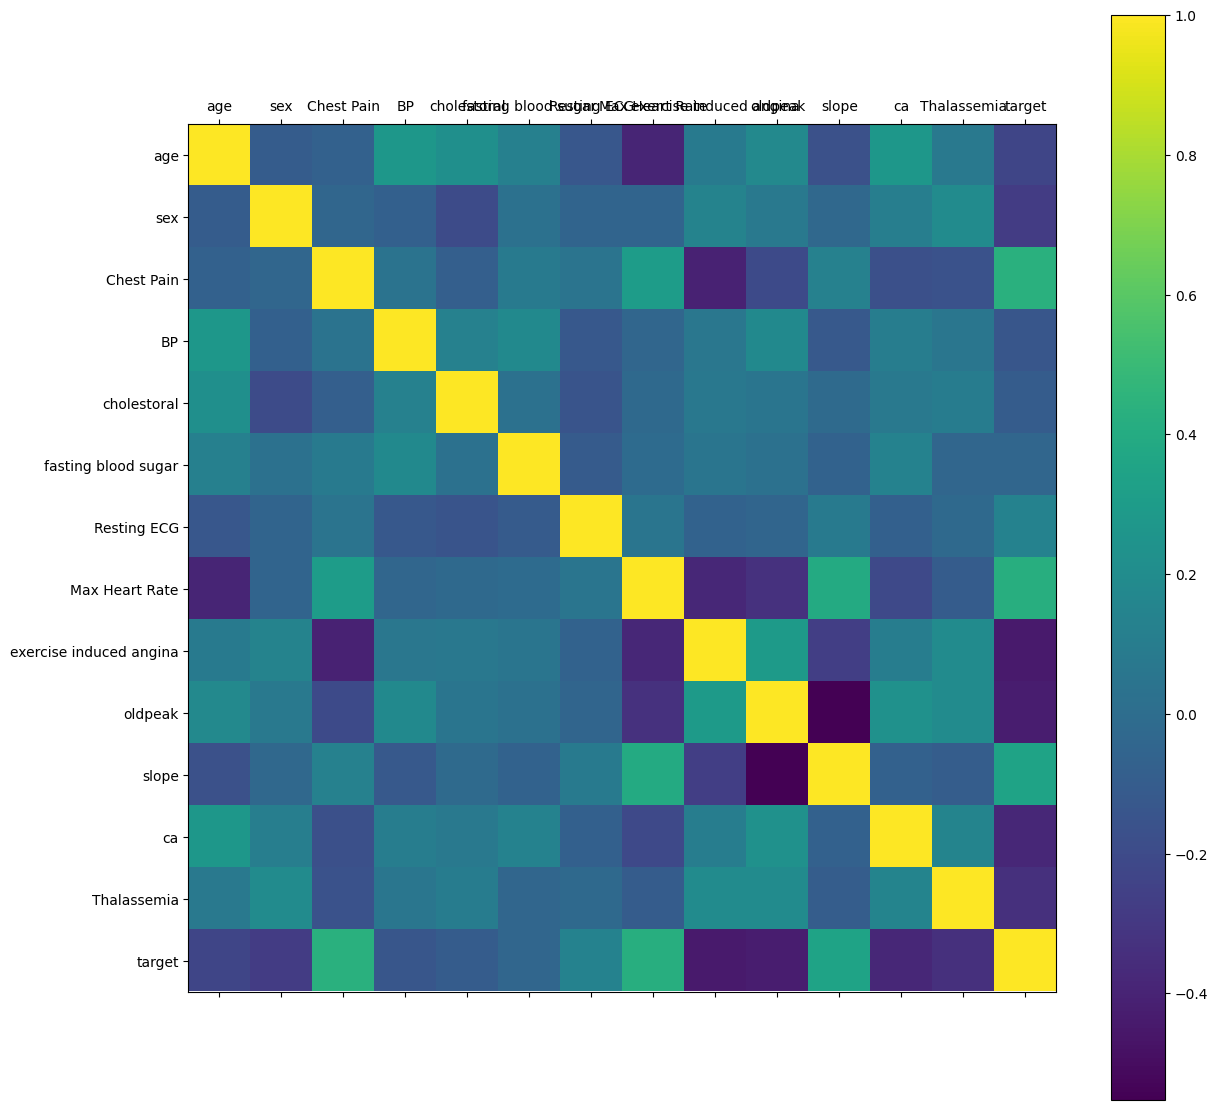

In [23]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(data.corr())
plt.yticks(np.arange(data.shape[1]), data.columns)
plt.xticks(np.arange(data.shape[1]), data.columns)
plt.colorbar()

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'sex'}>,
        <AxesSubplot: title={'center': 'Chest Pain'}>,
        <AxesSubplot: title={'center': 'BP'}>],
       [<AxesSubplot: title={'center': 'cholestoral'}>,
        <AxesSubplot: title={'center': 'fasting blood sugar'}>,
        <AxesSubplot: title={'center': 'Resting ECG'}>,
        <AxesSubplot: title={'center': 'Max Heart Rate'}>],
       [<AxesSubplot: title={'center': 'exercise induced angina'}>,
        <AxesSubplot: title={'center': 'oldpeak'}>,
        <AxesSubplot: title={'center': 'slope'}>,
        <AxesSubplot: title={'center': 'ca'}>],
       [<AxesSubplot: title={'center': 'Thalassemia'}>,
        <AxesSubplot: title={'center': 'target'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

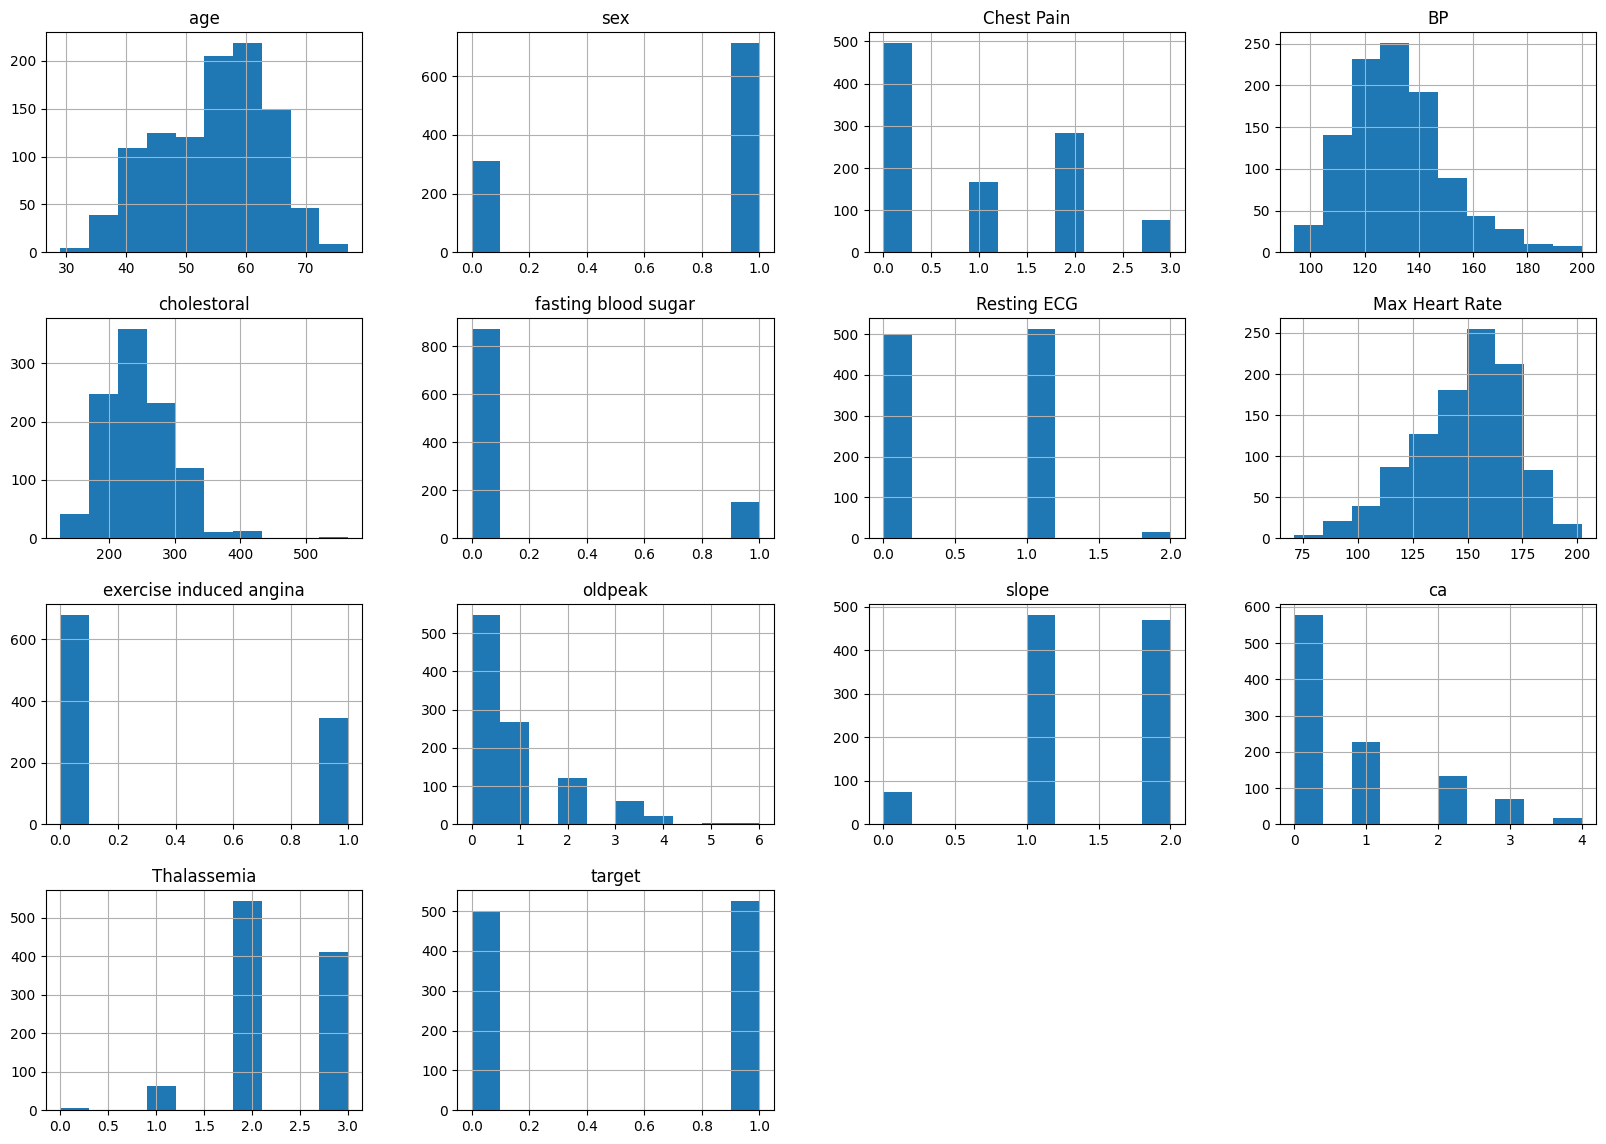

In [24]:
data.hist()

Text(0.5, 1.0, 'Count of target')

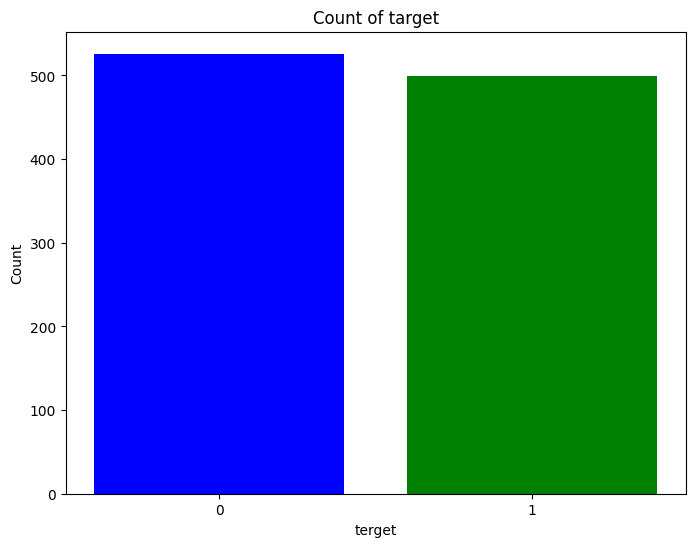

In [25]:
rcParams['figure.figsize'] = 8,6
plt.bar(data['target'].unique(), data['target'].value_counts(), color = ['blue', 'green'])
plt.xticks([0, 1])
plt.xlabel('terget')
plt.ylabel('Count')
plt.title('Count of target')
#(1 = yes, 0 = no)

In [26]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

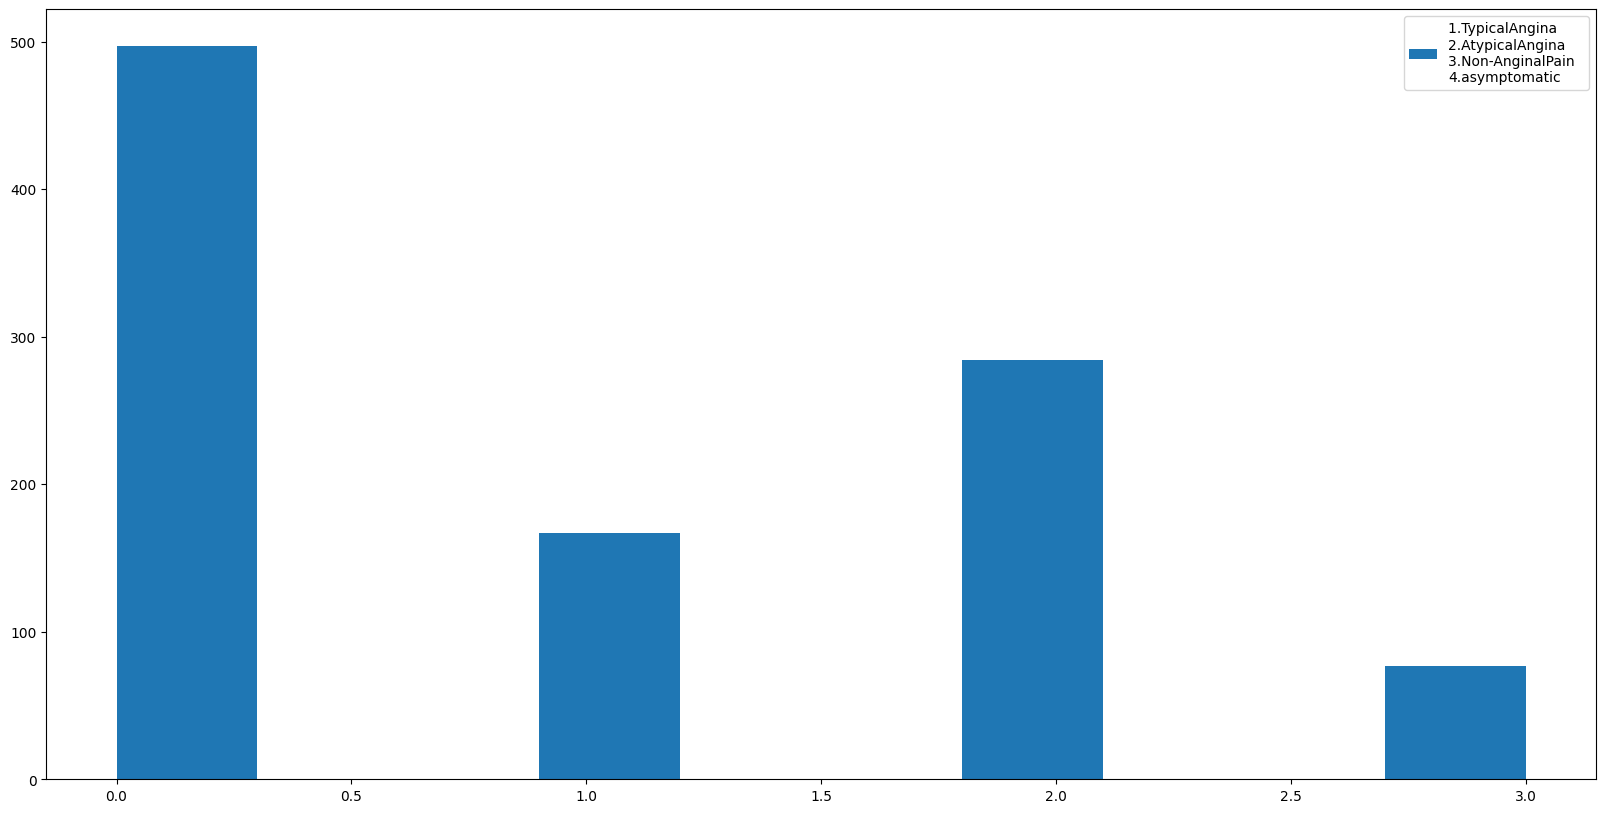

In [27]:
plt.figure(figsize=(20,10))
plt.hist(data["Chest Pain"], label=["1.TypicalAngina \n2.AtypicalAngina  \n3.Non-AnginalPain  \n4.asymptomatic"])
plt.legend(loc='upper right')

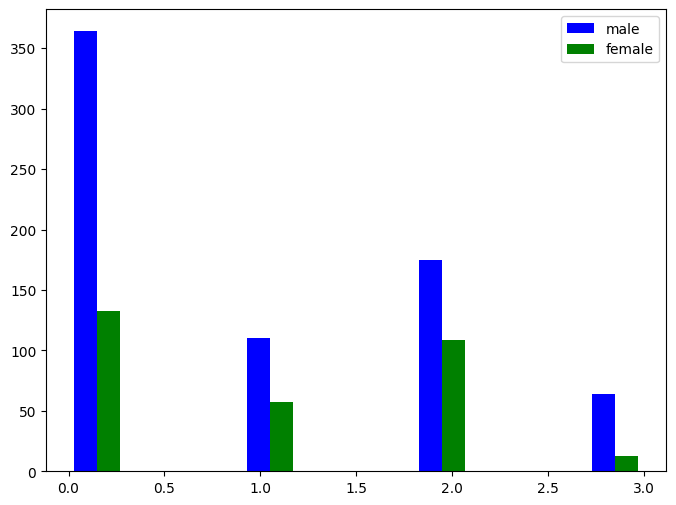

In [28]:
CPmale = data[["Chest Pain"]].where(data["sex"]==1).dropna()
CPfemale = data[["Chest Pain"]].where(data["sex"]==0).dropna()
plt.hist([CPmale["Chest Pain"],CPfemale["Chest Pain"]],label=["male","female"],color=["blue","green"])

plt.legend(loc="upper right")



In [29]:
X = data.drop(columns='target', axis=1)
Y = data['target']

In [30]:
print(X)

      age  sex  Chest Pain   BP  cholestoral  fasting blood sugar  \
0      52    1           0  125          212                    0   
1      53    1           0  140          203                    1   
2      70    1           0  145          174                    0   
3      61    1           0  148          203                    0   
4      62    0           0  138          294                    1   
...   ...  ...         ...  ...          ...                  ...   
1020   59    1           1  140          221                    0   
1021   60    1           0  125          258                    0   
1022   47    1           0  110          275                    0   
1023   50    0           0  110          254                    0   
1024   54    1           0  120          188                    0   

      Resting ECG  Max Heart Rate  exercise induced angina  oldpeak  slope  \
0               1             168                        0        1      2   
1              

In [31]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int32


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


In [34]:
modelog = LogisticRegression()

In [35]:
from sklearn.neighbors import KNeighborsClassifier

modelknc = KNeighborsClassifier()

In [36]:
from sklearn.tree import DecisionTreeClassifier
modeldtc = DecisionTreeClassifier()

In [37]:
from sklearn.svm import SVC
modelsvc = SVC()

In [38]:
modelog.fit(X_train, Y_train)


C:\Users\ebhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
modelknc.fit(X_train, Y_train)

KNeighborsClassifier()

In [40]:
modeldtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [41]:
modelsvc.fit(X_train, Y_train)

SVC()

In [42]:
X_train_prediction = modelog.predict(X_train)
training_data_accuracylog = accuracy_score(X_train_prediction, Y_train)


In [43]:
X_train_prediction = modelknc.predict(X_train)
training_data_accuracyknc = accuracy_score(X_train_prediction, Y_train)

In [44]:
X_train_prediction = modeldtc.predict(X_train)
training_data_accuracydtc = accuracy_score(X_train_prediction, Y_train)

In [45]:
X_train_prediction = modelsvc.predict(X_train)
training_data_accuracysvc = accuracy_score(X_train_prediction, Y_train)

In [62]:
print('Accuracy on Training data of logistic regression: ', training_data_accuracylog)

Accuracy on Training data of logistic regression:  0.8512195121951219


In [63]:
print('Accuracy on Training data of k neighbors classifier: ', training_data_accuracyknc)

Accuracy on Training data of k neighbors classifier:  0.9060975609756098


In [64]:
print('Accuracy on Training data of decision tree classifier : ', training_data_accuracydtc)

Accuracy on Training data of decision tree classifier :  1.0


In [65]:
print('Accuracy on Training data of super vector classifier : ', training_data_accuracysvc)

Accuracy on Training data of super vector classifier :  0.7182926829268292


In [50]:
X_test_prediction = modelog.predict(X_test)
test_data_accuracylog = accuracy_score(X_test_prediction, Y_test)

In [51]:
X_test_prediction = modelknc.predict(X_test)
test_data_accuracyknc= accuracy_score(X_test_prediction, Y_test)

In [52]:
X_test_prediction = modeldtc.predict(X_test)
test_data_accuracydtc= accuracy_score(X_test_prediction, Y_test)

In [53]:
X_test_prediction = modelsvc.predict(X_test)
test_data_accuracysvc= accuracy_score(X_test_prediction, Y_test)

In [54]:
print('Accuracy on Test data of logistic regression: ',test_data_accuracylog)

Accuracy on Test data of logistic regression:  0.8


In [55]:
print('Accuracy on Test data of kneighbor classifier: ', test_data_accuracyknc)

Accuracy on Test data of kneighbor classifier:  0.7219512195121951


In [56]:
print('Accuracy on Test data of decision tree classifier  : ', test_data_accuracydtc)

Accuracy on Test data of decision tree classifier  :  1.0


In [57]:
print('Accuracy on Test data of super vector classifier : ', test_data_accuracysvc)

Accuracy on Test data of super vector classifier :  0.697560975609756


In [58]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

input_data_as_numpy_array= np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = modelog.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


C:\Users\ebhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [59]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

input_data_as_numpy_array= np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = modelknc.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


C:\Users\ebhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [60]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

input_data_as_numpy_array= np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = modeldtc.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


C:\Users\ebhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [61]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

input_data_as_numpy_array= np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = modelsvc.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


C:\Users\ebhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
